## Assignment notes

In [9]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('RRCA_baseflow.csv')

In [11]:
df.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [41]:
num_days_since_zero = 738598 + 365
num_days_since_1900 = 45003
offset = num_days_since_zero - num_days_since_1900
df['days_since_1900'] = df.Date - offset
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,adj-date,days-since-1900,days_since_1900
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,1404692,16772,16772
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,1404723,16803,16803
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,1404751,16831,16831
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,1404782,16862,16862
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,1404812,16892,16892
...,...,...,...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500,1415770,27850,27850
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475,1415801,27881,27881
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951,1415831,27911,27911
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000,1415862,27942,27942


In [45]:
pd.period_range("1215-01-01", "1381-01-01", freq="D")

PeriodIndex(['1215-01-01', '1215-01-02', '1215-01-03', '1215-01-04',
             '1215-01-05', '1215-01-06', '1215-01-07', '1215-01-08',
             '1215-01-09', '1215-01-10',
             ...
             '1380-12-23', '1380-12-24', '1380-12-25', '1380-12-26',
             '1380-12-27', '1380-12-28', '1380-12-29', '1380-12-30',
             '1380-12-31', '1381-01-01'],
            dtype='period[D]', length=60632)

In [95]:
period = pd.Period('1900-1-1', freq='D') - pd.Period('0001-2-1', freq='D')
period

<693564 * Days>

In [58]:
offset

693961

In [91]:
offset

693963

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,days_since_1900,date,new_date,month,day,year
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,16769,1945-11-30,1945-11-30,11,30,1945
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,16800,1945-12-31,1945-12-31,12,31,1945


2000

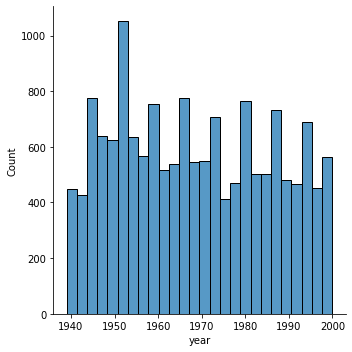

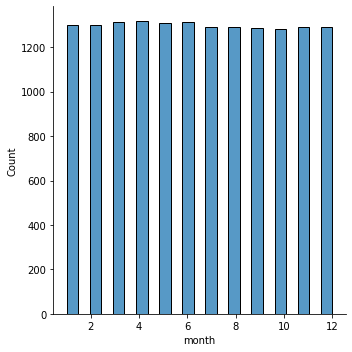

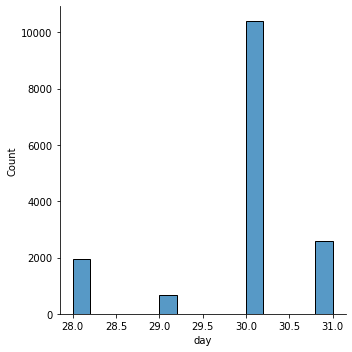

In [100]:
# num_days_since_zero = 738598 + 366
# num_days_since_1900 = 45003
# offset = num_days_since_zero - num_days_since_1900
offset = 693595 + 368
# offset = 693564
df['days_since_1900'] = df.Date - offset
df['date'] = pd.to_datetime(df.days_since_1900.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
display(df.head(2))
df.loc[0,'date'].month
df['year'] = df.date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.date.apply(lambda x:pd.to_datetime(x).day)

import seaborn as sns
sns.displot(data=df, x='year')
sns.displot(data=df, x='month')
sns.displot(data=df, x='day')
# df.month
df.year.max()

In [103]:
df[(df.year == 2000) & (df.Segment_id == 144)]

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,days_since_1900,date,new_date,month,day,year
114,730515,144,1086190,14476800,0.43,15.65,0.0000,1.476667,36552,2000-01-29,2000-01-29,1,29,2000
115,730546,144,1086190,14476800,0.86,15.65,0.0000,2.926667,36583,2000-02-29,2000-02-29,2,29,2000
116,730576,144,1086190,14476800,3.94,15.65,0.0000,2.820492,36613,2000-03-30,2000-03-30,3,30,2000
117,730607,144,1086190,14476800,8.05,15.65,-0.1047,0.970492,36644,2000-04-30,2000-04-30,4,30,2000
